## Trabalho Final

Este notebook tem como objetivo realizar o tratamento e análise exploratória dos dados eleitorais disponibilizados pelo TSE. 

### Etapas:
1. Carregamento e inspeção inicial dos dados.
2. Tratamento de inconsistências e valores faltantes.
3. Integração das bases de dados.
4. Análise exploratória e visualizações.
5. Preparação do dataset final para análise.

## 1. Carregamento e inspeção inicial dos dados.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
# Lista com os caminhos dos arquivos CSV
arquivos_csv = [
    "candidatos\\consulta_cand_2012_RS.csv",
    "candidatos\\consulta_cand_2016_RS.csv",
    "candidatos\\consulta_cand_2020_RS.csv",
    "resultados\\votacao_candidato_munzona_2012_RS.csv",
    "resultados\\votacao_candidato_munzona_2016_RS.csv",
    "resultados\\votacao_candidato_munzona_2020_RS.csv"
]

# Função para transformar um arquivo CSV em UTF-8
def transformar_para_utf8(caminho_arquivo):
    # Detectar a codificação do arquivo
    with open(caminho_arquivo, "rb") as f:
        result = chardet.detect(f.read(10000))
        encoding_detectada = result['encoding']

    # Ler o arquivo com a codificação detectada
    with open(caminho_arquivo, "r", encoding=encoding_detectada, errors="replace") as infile:
        conteudo = infile.read()

    # Sobrescrever o arquivo em UTF-8
    with open(caminho_arquivo, "w", encoding="utf-8") as outfile:
        outfile.write(conteudo)

# Transformar todos os arquivos na lista
for arquivo in arquivos_csv:
    transformar_para_utf8(arquivo)

print("Todos os arquivos foram transformados para UTF-8 com sucesso.")

Todos os arquivos foram transformados para UTF-8 com sucesso.


In [3]:
# Definindo os caminhos dos arquivos
path_cand_2012 = "candidatos\\consulta_cand_2012_RS.csv"
path_cand_2016 = "candidatos\\consulta_cand_2016_RS.csv"
path_cand_2020 = "candidatos\\consulta_cand_2020_RS.csv"

path_votos_2012 = "resultados\\votacao_candidato_munzona_2012_RS.csv"
path_votos_2016 = "resultados\\votacao_candidato_munzona_2016_RS.csv"
path_votos_2020 = "resultados\\votacao_candidato_munzona_2020_RS.csv"

# Carregando os dados
cand_2012 = pd.read_csv(path_cand_2012, sep=";", encoding="utf-8")
cand_2016 = pd.read_csv(path_cand_2016, sep=";", encoding="utf-8")
cand_2020 = pd.read_csv(path_cand_2020, sep=";", encoding="utf-8")

votos_2012 = pd.read_csv(path_votos_2012, sep=";", encoding="utf-8")
votos_2016 = pd.read_csv(path_votos_2016, sep=";", encoding="utf-8")
votos_2020 = pd.read_csv(path_votos_2020, sep=";", encoding="utf-8")

C:\Users\alicc\AppData\Local\Temp\ipykernel_17520\3507650244.py:11: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  cand_2012 = pd.read_csv(path_cand_2012, sep=";", encoding="utf-8")


In [4]:
# # Exibindo as primeiras linhas de cada dataset para inspeção inicial

# print("Candidatos 2012:")
# display(cand_2012.head())
# len(cand_2012)

# print("\nCandidatos 2016:")
# display(cand_2016.head())
# len(cand_2016)

# print("\nCandidatos 2020:")
# display(cand_2020.head())
# len(cand_2020)

# print("\nVotação 2012:")
# display(votos_2012.head())
# len(votos_2012)

# print("\nVotação 2016:")
# display(votos_2016.head())
# len(votos_2016)

# print("\nVotação 2020:")
# display(votos_2020.head())
# len(votos_2020)

In [5]:
# Função auxiliar para inspecionar as bases de dados
def resumo_dataset(nome, dataset):
    print(f"Resumo do dataset: {nome}")
    print("-" * 50)
    print(f"Dimensões: {dataset.shape}")
    print("\nTipos de dados:")
    print(dataset.dtypes)
    print("\nDados faltantes:")
    print(dataset.isnull().sum())
    print("\nAmostra:")

# Inspecionando cada dataset
resumo_dataset("Candidatos 2012", cand_2012)
resumo_dataset("Candidatos 2016", cand_2016)
resumo_dataset("Candidatos 2020", cand_2020)

resumo_dataset("Votação 2012", votos_2012)
resumo_dataset("Votação 2016", votos_2016)
resumo_dataset("Votação 2020", votos_2020)

Resumo do dataset: Candidatos 2012
--------------------------------------------------
Dimensões: (29079, 63)

Tipos de dados:
DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int64
CD_TIPO_ELEICAO                  int64
NM_TIPO_ELEICAO                 object
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO     int64
DS_SITUACAO_CANDIDATO_PLEITO    object
CD_SITUACAO_CANDIDATO_URNA       int64
DS_SITUACAO_CANDIDATO_URNA      object
ST_CANDIDATO_INSERIDO_URNA      object
Length: 63, dtype: object

Dados faltantes:
DT_GERACAO                      0
HH_GERACAO                      0
ANO_ELEICAO                     0
CD_TIPO_ELEICAO                 0
NM_TIPO_ELEICAO                 0
                               ..
CD_SITUACAO_CANDIDATO_PLEITO    0
DS_SITUACAO_CANDIDATO_PLEITO    0
CD_SITUACAO_CANDIDATO_URNA      0
DS_SITUACAO_CANDIDATO_URNA      0
ST_CANDIDATO_INSERIDO_URNA      0
Length: 63, dtype: int64

A

In [6]:
# Selecionando colunas relevantes dos datasets de candidatos
colunas_candidatos = [
    "SQ_CANDIDATO",      # Número sequencial da candidato(a)  
    "ANO_ELEICAO",       # Ano da eleição
    "SG_UE",             # Sigla da Unidade Eleitoral
    "NM_UE",             # Nome da Unidade Eleitoral
    "CD_CARGO",          # Código do cargo
    "DS_CARGO",          # Descrição do cargo
    "NM_CANDIDATO",      # Nome completo do candidato
    "CD_GENERO",         # Código do gênero
    "DS_GENERO",         # Descrição do gênero
    "CD_GRAU_INSTRUCAO", # Código do grau de instrução
    "DS_GRAU_INSTRUCAO", # Descrição do grau de instrução
    "CD_COR_RACA",       # Código da cor/raça 1:BRANCA 2:PRETA 3:PARDA 4:AMARELA 5:INDIGENA 6:NAO INFORMADO
    "DS_COR_RACA"        # Descrição da cor/raça da candidata ou candidato
]

cand_2012 = cand_2012[colunas_candidatos]
cand_2016 = cand_2016[colunas_candidatos]
cand_2020 = cand_2020[colunas_candidatos]

# Exibindo as dimensões após a seleção
print(f"Candidatos 2012: {cand_2012.shape}")
print(f"Candidatos 2016: {cand_2016.shape}")
print(f"Candidatos 2020: {cand_2020.shape}")

Candidatos 2012: (29079, 13)
Candidatos 2016: (28934, 13)
Candidatos 2020: (33611, 13)


In [7]:
# Selecionando colunas relevantes dos datasets de votação
colunas_votacao = [
    "SQ_CANDIDATO",     # Número sequencial da candidato(a) 
    "QT_VOTOS_NOMINAIS", # Quantidade de votos nominais
    "DS_SIT_TOT_TURNO"
]                

votos_2012 = votos_2012[colunas_votacao]
votos_2016 = votos_2016[colunas_votacao]
votos_2020 = votos_2020[colunas_votacao]


print(f"Votação 2012: {votos_2012.shape}")
print(f"Votação 2016: {votos_2016.shape}")
print(f"Votação 2020: {votos_2020.shape}")


Votação 2012: (37468, 3)
Votação 2016: (37234, 3)
Votação 2020: (44541, 3)


# 2. Tratamento de inconsistências e valores faltantes.

In [8]:
# Agrupando por SQ_CANDIDATO e mantendo a coluna DS_SIT_TOT_TURNO
votos_2012 = votos_2012.groupby("SQ_CANDIDATO", as_index=False).agg({
    "QT_VOTOS_NOMINAIS": "sum",  # Soma dos votos
    "DS_SIT_TOT_TURNO": "first"  # Mantém o primeiro valor de DS_SIT_TOT_TURNO (assumindo que não varia dentro do grupo)
})

votos_2016 = votos_2016.groupby("SQ_CANDIDATO", as_index=False).agg({
    "QT_VOTOS_NOMINAIS": "sum",
    "DS_SIT_TOT_TURNO": "first"
})

votos_2020 = votos_2020.groupby("SQ_CANDIDATO", as_index=False).agg({
    "QT_VOTOS_NOMINAIS": "sum",
    "DS_SIT_TOT_TURNO": "first"
})


In [9]:
# Função para verificar valores nulos em um DataFrame
def tratar_valores_nulos(dataset, nome, colunas_essenciais):
    print(f"Tratando valores nulos no dataset: {nome}")
    print("-" * 50)
    
    # Contando valores nulos por coluna
    print("Quantidade de valores nulos por coluna:")
    print(dataset.isnull().sum())
    
    # Remover linhas com valores nulos nas colunas essenciais
    dataset = dataset.dropna(subset=colunas_essenciais)
    print(f"\nApós remoção de valores nulos, dimensões: {dataset.shape}")
    print("=" * 50, "\n")
    
    return dataset

# Colunas essenciais para os datasets de votação
colunas_essenciais_votacao = ["SQ_CANDIDATO", "QT_VOTOS_NOMINAIS"]

# Colunas essenciais para os datasets de candidatos
colunas_essenciais_candidatos = ["SQ_CANDIDATO", "DS_CARGO", "NM_CANDIDATO", "DS_GRAU_INSTRUCAO"]

# Aplicando a função para os datasets de votação
votos_2012 = tratar_valores_nulos(votos_2012, "Votação 2012", colunas_essenciais_votacao)
votos_2016 = tratar_valores_nulos(votos_2016, "Votação 2016", colunas_essenciais_votacao)
votos_2020 = tratar_valores_nulos(votos_2020, "Votação 2020", colunas_essenciais_votacao)

# Aplicando a função para os datasets de candidatos
cand_2012 = tratar_valores_nulos(cand_2012, "Candidatos 2012", colunas_essenciais_candidatos)
cand_2016 = tratar_valores_nulos(cand_2016, "Candidatos 2016", colunas_essenciais_candidatos)
cand_2020 = tratar_valores_nulos(cand_2020, "Candidatos 2020", colunas_essenciais_candidatos)


Tratando valores nulos no dataset: Votação 2012
--------------------------------------------------
Quantidade de valores nulos por coluna:
SQ_CANDIDATO         0
QT_VOTOS_NOMINAIS    0
DS_SIT_TOT_TURNO     0
dtype: int64

Após remoção de valores nulos, dimensões: (26854, 3)

Tratando valores nulos no dataset: Votação 2016
--------------------------------------------------
Quantidade de valores nulos por coluna:
SQ_CANDIDATO         0
QT_VOTOS_NOMINAIS    0
DS_SIT_TOT_TURNO     0
dtype: int64

Após remoção de valores nulos, dimensões: (26465, 3)

Tratando valores nulos no dataset: Votação 2020
--------------------------------------------------
Quantidade de valores nulos por coluna:
SQ_CANDIDATO         0
QT_VOTOS_NOMINAIS    0
DS_SIT_TOT_TURNO     0
dtype: int64

Após remoção de valores nulos, dimensões: (31108, 3)

Tratando valores nulos no dataset: Candidatos 2012
--------------------------------------------------
Quantidade de valores nulos por coluna:
SQ_CANDIDATO         0
ANO_ELE

In [10]:
# Função para verificar e corrigir valores negativos em um DataFrame
def tratar_valores_negativos(dataset, nome, colunas_essenciais):
    print(f"Tratando valores negativos no dataset: {nome}")
    print("-" * 50)
    
    # Verificando valores negativos nas colunas numéricas
    for col in colunas_essenciais:
        if dataset[col].dtype in ['int64', 'float64']:  # Só vamos verificar as colunas numéricas
            negativos = dataset[dataset[col] < 0]
            if not negativos.empty:
                print(f"Valores negativos encontrados na coluna '{col}':")
                print(negativos[[col]])  # Exibe os valores negativos encontrados
            
            # Corrigindo os valores negativos (substituindo por 0)
            dataset[col] = dataset[col].apply(lambda x: max(x, 0))  # Substitui valores negativos por 0

    print(f"\nApós tratamento de valores negativos, dimensões: {dataset.shape}")
    print("=" * 50, "\n")
    
    return dataset

# Colunas essenciais para os datasets de votação (onde esperamos valores numéricos, como votos)
colunas_essenciais_votacao = ["QT_VOTOS_NOMINAIS"]

# Aplicando a função para os datasets de votação
votos_2012 = tratar_valores_negativos(votos_2012, "Votação 2012", colunas_essenciais_votacao)
votos_2016 = tratar_valores_negativos(votos_2016, "Votação 2016", colunas_essenciais_votacao)
votos_2020 = tratar_valores_negativos(votos_2020, "Votação 2020", colunas_essenciais_votacao)

Tratando valores negativos no dataset: Votação 2012
--------------------------------------------------

Após tratamento de valores negativos, dimensões: (26854, 3)

Tratando valores negativos no dataset: Votação 2016
--------------------------------------------------

Após tratamento de valores negativos, dimensões: (26465, 3)

Tratando valores negativos no dataset: Votação 2020
--------------------------------------------------

Após tratamento de valores negativos, dimensões: (31108, 3)



In [11]:
# Função para transformar todo o DataFrame em maiúsculas
def converter_para_upper(df):
    return df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Convertendo todos os DataFrames para maiúsculas
cand_2012 = converter_para_upper(cand_2012)
cand_2016 = converter_para_upper(cand_2016)
cand_2020 = converter_para_upper(cand_2020)

votos_2012 = converter_para_upper(votos_2012)
votos_2016 = converter_para_upper(votos_2016)
votos_2020 = converter_para_upper(votos_2020)

C:\Users\alicc\AppData\Local\Temp\ipykernel_17520\758687939.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [12]:
# Filtrando os dados para o município de Porto Alegre e os cargos Vereador e Prefeito
municipio = "PORTO ALEGRE"
cargos = ["VEREADOR", "PREFEITO"]

# Aplicando os filtros nos datasets de candidatos
cand_2012 = cand_2012[(cand_2012["NM_UE"] == municipio) & (cand_2012["DS_CARGO"].isin(cargos))]
cand_2016 = cand_2016[(cand_2016["NM_UE"] == municipio) & (cand_2016["DS_CARGO"].isin(cargos))]
cand_2020 = cand_2020[(cand_2020["NM_UE"] == municipio) & (cand_2020["DS_CARGO"].isin(cargos))]

# Exibindo as dimensões após o filtro
print(f"Candidatos 2012: {cand_2012.shape}")
print(f"Candidatos 2016: {cand_2016.shape}")
print(f"Candidatos 2020: {cand_2020.shape}")

Candidatos 2012: (607, 13)
Candidatos 2016: (611, 13)
Candidatos 2020: (881, 13)


In [13]:
# Verificando duplicatas

print(f"Duplicatas em candidatos 2012: {cand_2012.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em candidatos 2016: {cand_2016.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em candidatos 2020: {cand_2020.duplicated(subset='SQ_CANDIDATO').sum()}")

print(f"Duplicatas em votos 2012: {votos_2012.duplicated(subset=['SQ_CANDIDATO', 'QT_VOTOS_NOMINAIS']).sum()}")
print(f"Duplicatas em votos 2012: {votos_2016.duplicated(subset=['SQ_CANDIDATO', 'QT_VOTOS_NOMINAIS']).sum()}")
print(f"Duplicatas em votos 2012: {votos_2020.duplicated(subset=['SQ_CANDIDATO', 'QT_VOTOS_NOMINAIS']).sum()}")

Duplicatas em candidatos 2012: 0
Duplicatas em candidatos 2016: 2
Duplicatas em candidatos 2020: 2
Duplicatas em votos 2012: 0
Duplicatas em votos 2012: 0
Duplicatas em votos 2012: 0


In [14]:
# Removendo duplicatas nos datasets de candidatos (baseado na coluna SQ_CANDIDATO)
cand_2012 = cand_2012.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência
cand_2016 = cand_2016.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência
cand_2020 = cand_2020.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência

# Removendo duplicatas nos datasets de candidatos (baseado na coluna SQ_CANDIDATO)
votos_2012 = votos_2012.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência
votos_2016 = votos_2016.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência
votos_2020 = votos_2020.drop_duplicates(subset="SQ_CANDIDATO", keep="first")  # Mantém a primeira ocorrência

# Exibindo as dimensões após a remoção de duplicatas
print(f"Duplicatas em candidatos 2012: {cand_2012.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em candidatos 2016: {cand_2016.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em candidatos 2020: {cand_2020.duplicated(subset='SQ_CANDIDATO').sum()}")

print(f"Duplicatas em votos 2012: {votos_2012.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em votos 2016: {votos_2016.duplicated(subset='SQ_CANDIDATO').sum()}")
print(f"Duplicatas em votos 2020: {votos_2020.duplicated(subset='SQ_CANDIDATO').sum()}")


Duplicatas em candidatos 2012: 0
Duplicatas em candidatos 2016: 0
Duplicatas em candidatos 2020: 0
Duplicatas em votos 2012: 0
Duplicatas em votos 2016: 0
Duplicatas em votos 2020: 0


In [15]:
# Certificando que QT_VOTOS_NOMINAIS não contenha valores negativos

votos_2012 = votos_2012[votos_2012["QT_VOTOS_NOMINAIS"] >= 0]
votos_2016 = votos_2016[votos_2016["QT_VOTOS_NOMINAIS"] >= 0]
votos_2020 = votos_2020[votos_2020["QT_VOTOS_NOMINAIS"] >= 0]

### 1.1 Integração

In [17]:
cand_votos_2012 = cand_2012.merge(votos_2012, on="SQ_CANDIDATO", how="inner")
cand_votos_2016 = cand_2016.merge(votos_2016, on="SQ_CANDIDATO", how="inner")
cand_votos_2020 = cand_2020.merge(votos_2020, on="SQ_CANDIDATO", how="inner")

In [18]:
print(f"Dimensões após integração - 2012: {cand_votos_2012.shape}")
print(f"Dimensões após integração - 2016: {cand_votos_2016.shape}")
print(f"Dimensões após integração - 2020: {cand_votos_2020.shape}")

Dimensões após integração - 2012: (576, 15)
Dimensões após integração - 2016: (560, 15)
Dimensões após integração - 2020: (845, 15)


In [19]:
# % de Votos Nominais: Calcule a porcentagem de votos nominais de cada candidato em relação ao total de votos.
for df in [cand_votos_2012, cand_votos_2016, cand_votos_2020]:
    total_votos = df["QT_VOTOS_NOMINAIS"].sum()
    df["PERC_VOTOS"] = (df["QT_VOTOS_NOMINAIS"] / total_votos) * 100

In [20]:
# Classificação por Desempenho
for df in [cand_votos_2012, cand_votos_2016, cand_votos_2020]:
    df["CLASSIFICACAO"] = df["QT_VOTOS_NOMINAIS"].rank(ascending=False, method="min").astype(int)

In [21]:
# # Classificação por Desempenho
# for df in [cand_votos_2012, cand_votos_2016, cand_votos_2020]:
#     df["CLASSIFICACAO"] = df["QT_VOTOS_NOMINAIS"].rank(ascending=False, method="min").astype(int)

### 1.2 Dataframe final

In [22]:
# Adicionando a coluna do ano
cand_votos_2012["ANO_ELEICAO"] = 2012
cand_votos_2016["ANO_ELEICAO"] = 2016
cand_votos_2020["ANO_ELEICAO"] = 2020

# Unindo os DataFrames
cand_votos_total = pd.concat([cand_votos_2012, cand_votos_2016, cand_votos_2020], ignore_index=True)

# Exibindo dimensões do DataFrame unificado
print(f"Dimensões do DataFrame consolidado: {cand_votos_total.shape}")

Dimensões do DataFrame consolidado: (1981, 17)


# 4. Análise exploratória e visualizações.

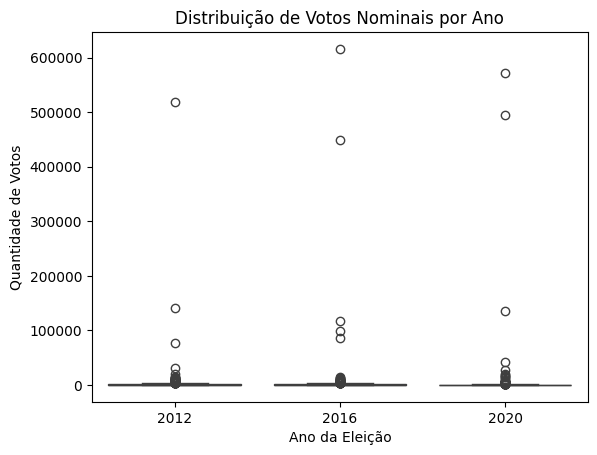

In [23]:
sns.boxplot(data=cand_votos_total, x="ANO_ELEICAO", y="QT_VOTOS_NOMINAIS")
plt.title("Distribuição de Votos Nominais por Ano")
plt.xlabel("Ano da Eleição")
plt.ylabel("Quantidade de Votos")
plt.show()

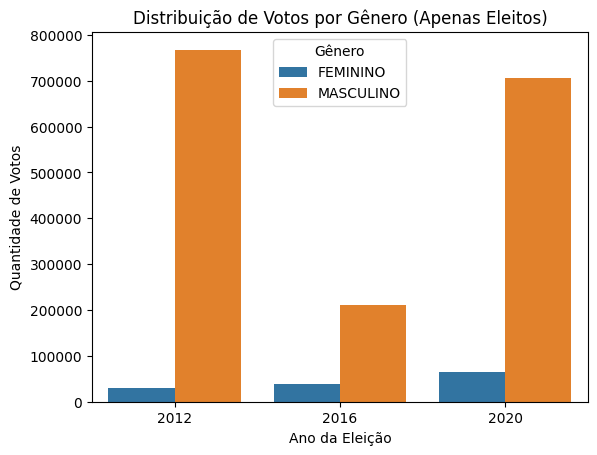

In [24]:
candidatos_filtrados = cand_votos_total[
    ((cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR MÉDIA") |
     (cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR QP") |
     (cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO"))]

genero_votos_eleitos = candidatos_filtrados.groupby(["ANO_ELEICAO", "DS_GENERO"])["QT_VOTOS_NOMINAIS"].sum().reset_index()

sns.barplot(data=genero_votos_eleitos, x="ANO_ELEICAO", y="QT_VOTOS_NOMINAIS", hue="DS_GENERO")
plt.title("Distribuição de Votos por Gênero (Apenas Eleitos)")
plt.xlabel("Ano da Eleição")
plt.ylabel("Quantidade de Votos")
plt.legend(title="Gênero")
plt.show()


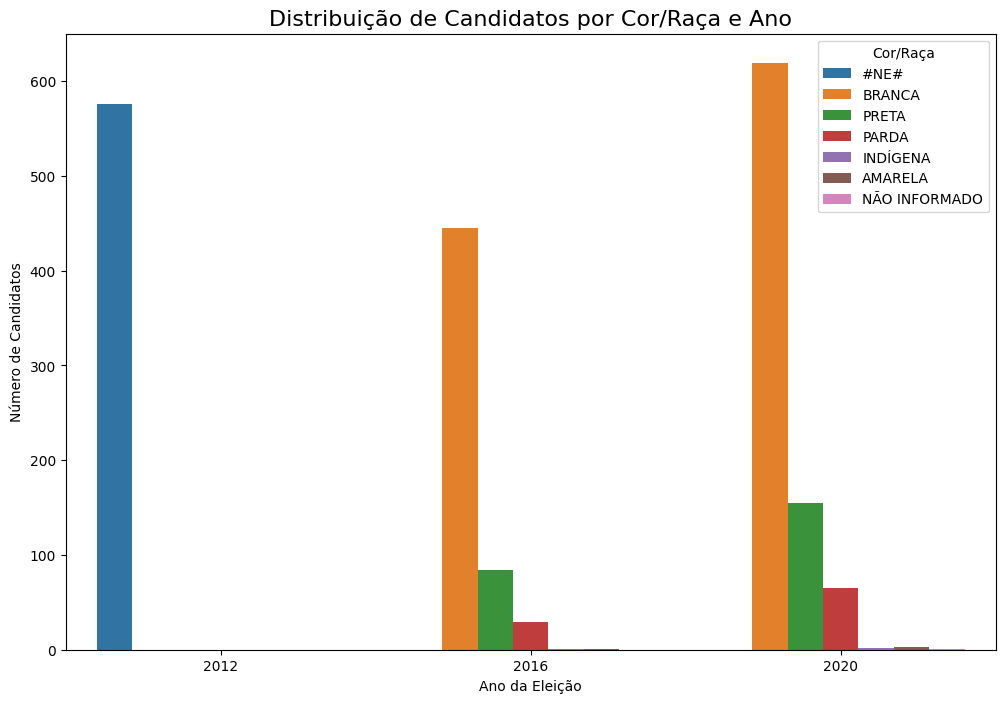

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(
    data=cand_votos_total, 
    x="ANO_ELEICAO", 
    hue="DS_COR_RACA"
)
plt.title("Distribuição de Candidatos por Cor/Raça e Ano", fontsize=16)
plt.xlabel("Ano da Eleição")
plt.ylabel("Número de Candidatos")
plt.legend(title="Cor/Raça")
plt.show()

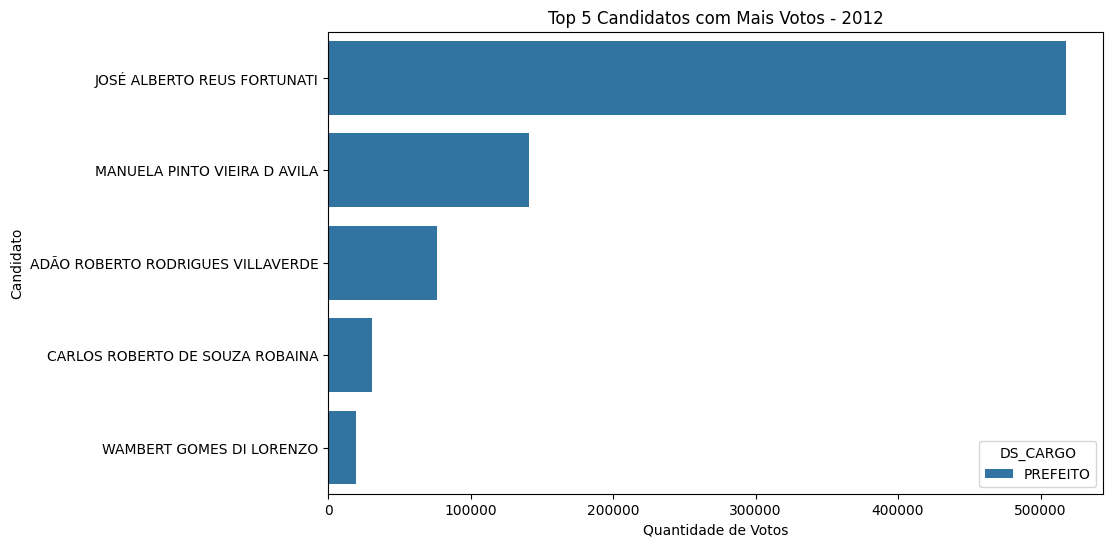

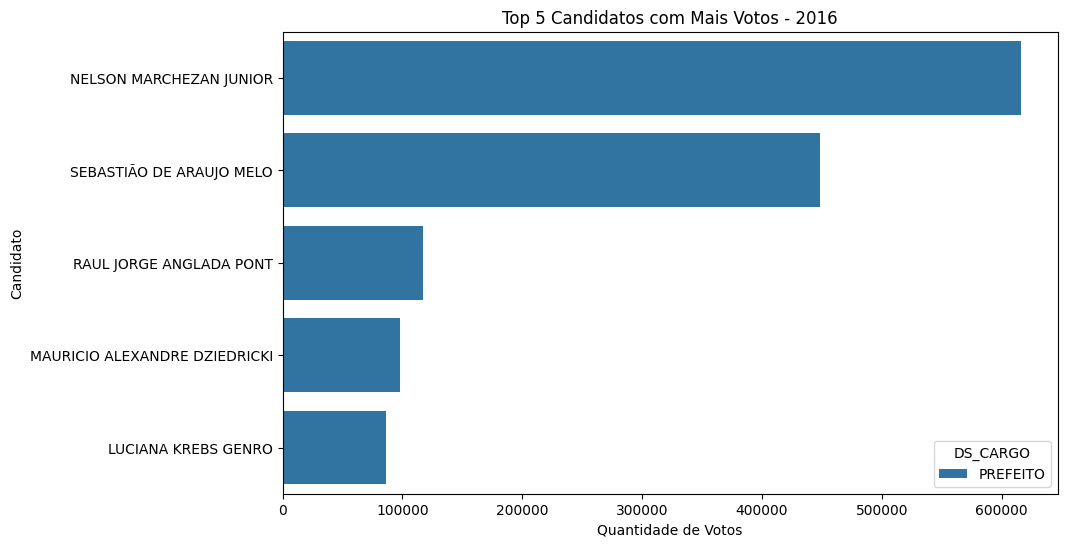

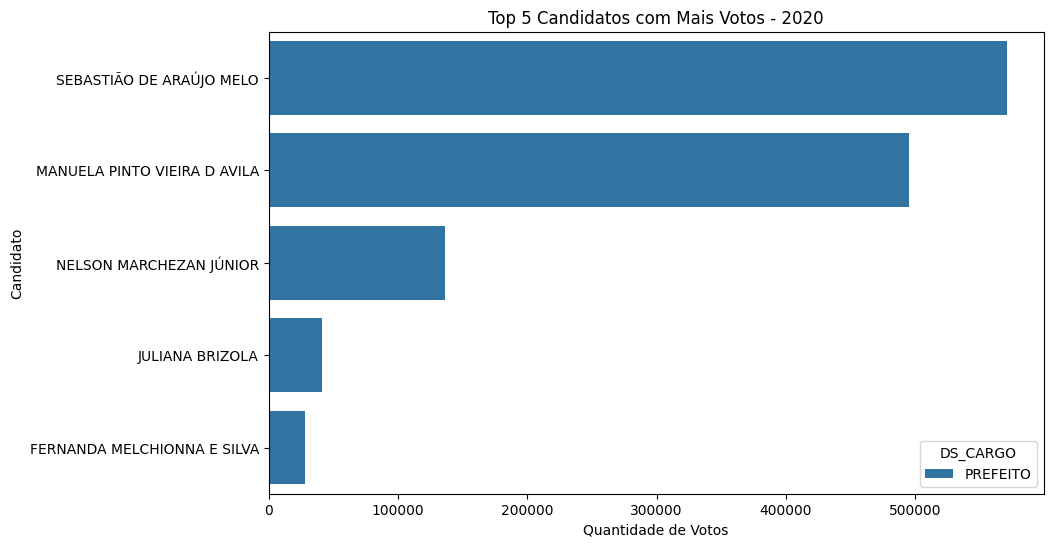

In [26]:
for ano in cand_votos_total["ANO_ELEICAO"].unique():
    top_candidatos = cand_votos_total[cand_votos_total["ANO_ELEICAO"] == ano].nlargest(5, "QT_VOTOS_NOMINAIS")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_candidatos, x="QT_VOTOS_NOMINAIS", y="NM_CANDIDATO", hue="DS_CARGO")
    plt.title(f"Top 5 Candidatos com Mais Votos - {ano}")
    plt.xlabel("Quantidade de Votos")
    plt.ylabel("Candidato")
    plt.show()

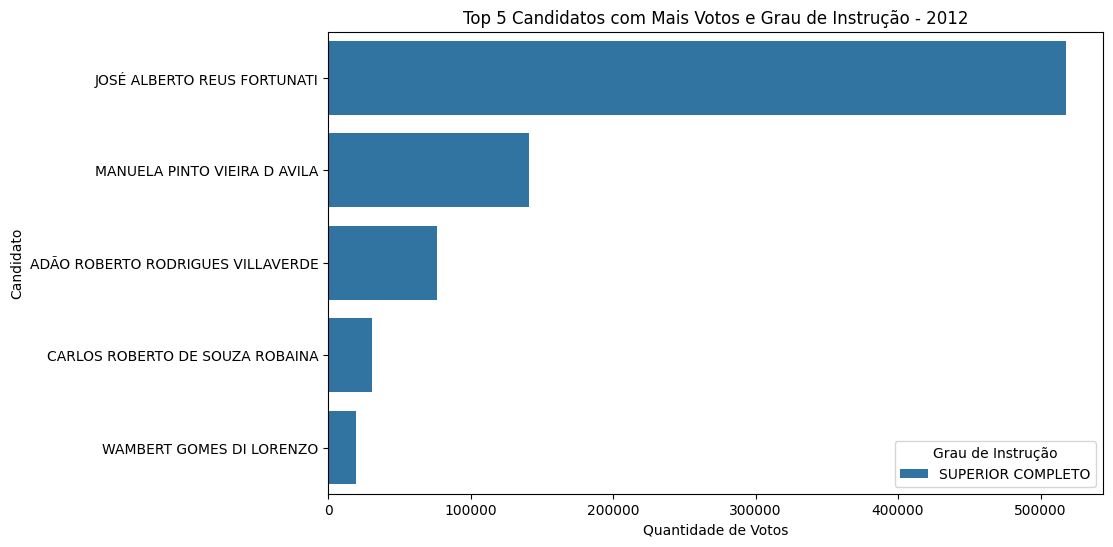

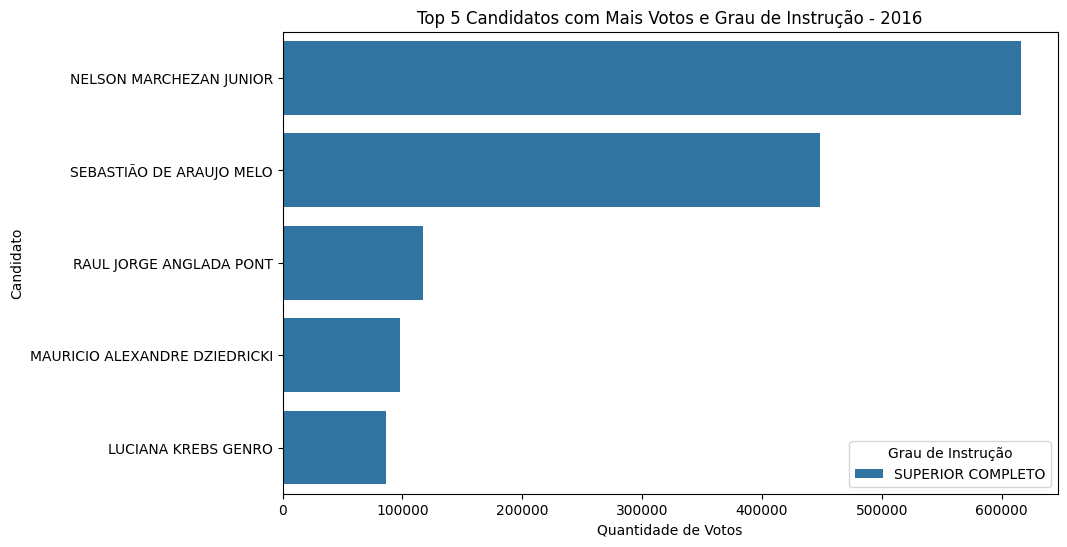

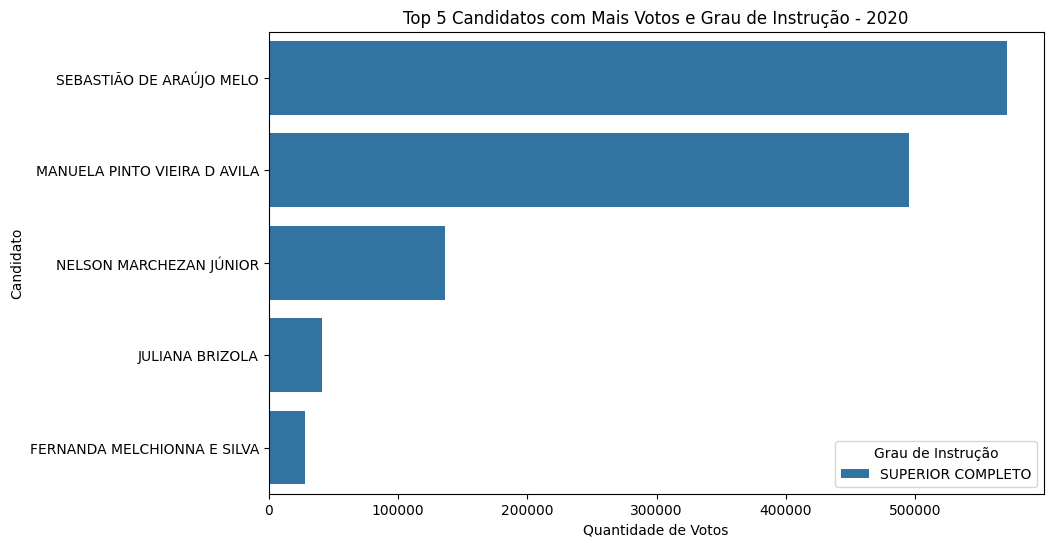

In [27]:
for ano in cand_votos_total["ANO_ELEICAO"].unique():
    top_candidatos = cand_votos_total[cand_votos_total["ANO_ELEICAO"] == ano].nlargest(5, "QT_VOTOS_NOMINAIS")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_candidatos, x="QT_VOTOS_NOMINAIS", y="NM_CANDIDATO", hue="DS_GRAU_INSTRUCAO")
    plt.title(f"Top 5 Candidatos com Mais Votos e Grau de Instrução - {ano}")
    plt.xlabel("Quantidade de Votos")
    plt.ylabel("Candidato")
    plt.legend(title="Grau de Instrução")
    plt.show()

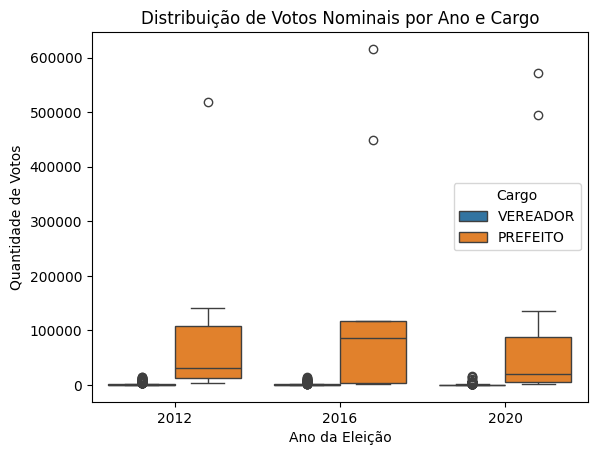

In [28]:
# cargo_votos = cand_votos_total.groupby("DS_CARGO")["QT_VOTOS_NOMINAIS"].sum().reset_index()
# sns.barplot(data=cargo_votos, x="QT_VOTOS_NOMINAIS", y="DS_CARGO")
# plt.title("Votos por Cargo")
# plt.xlabel("Quantidade de Votos")
# plt.ylabel("Cargo")
# plt.show()

sns.boxplot(data=cand_votos_total, x="ANO_ELEICAO", y="QT_VOTOS_NOMINAIS", hue="DS_CARGO")
plt.title("Distribuição de Votos Nominais por Ano e Cargo")
plt.xlabel("Ano da Eleição")
plt.ylabel("Quantidade de Votos")
plt.legend(title="Cargo")
plt.show()


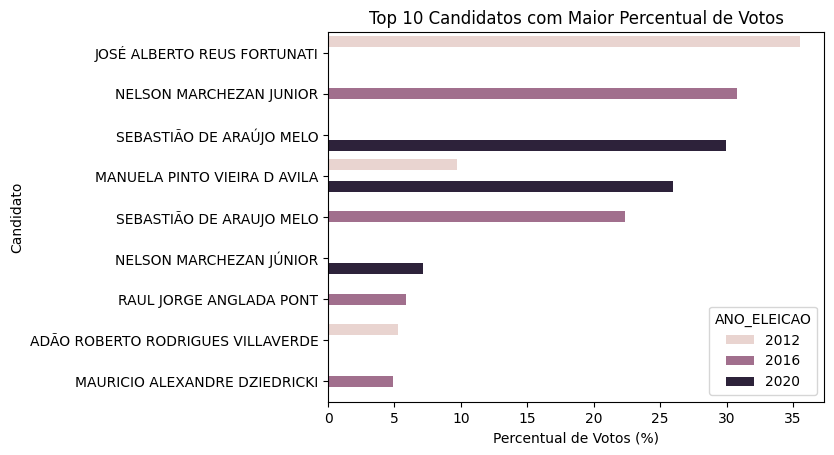

In [29]:
perc_votos = cand_votos_total.nlargest(10, "PERC_VOTOS")
sns.barplot(data=perc_votos, x="PERC_VOTOS", y="NM_CANDIDATO", hue="ANO_ELEICAO")
plt.title("Top 10 Candidatos com Maior Percentual de Votos")
plt.xlabel("Percentual de Votos (%)")
plt.ylabel("Candidato")
plt.show()

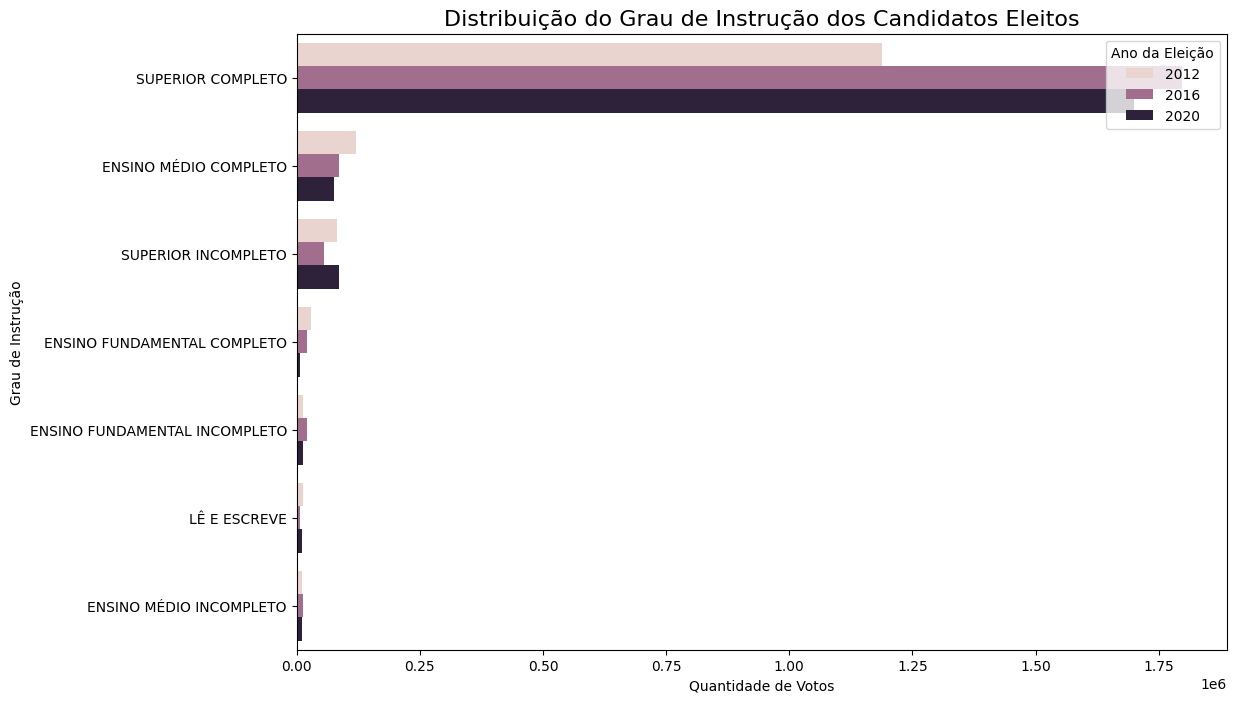

In [30]:
# Filtrar apenas os candidatos eleitos
# candidatos_eleitos = cand_votos_total[cand_votos_total["SITUACAO"] == "ELEITO"]

# Filtrar os 100 candidatos eleitos mais votados por ano
top_candidatos_instrucao = cand_votos_total.nlargest(100, "QT_VOTOS_NOMINAIS")

# Agrupar para obter a soma de votos por grau de instrução e ano
agrupado_instrucao = (
    cand_votos_total.groupby(["ANO_ELEICAO", "DS_GRAU_INSTRUCAO"])["QT_VOTOS_NOMINAIS"]
    .sum()
    .reset_index()
)

# Ordenar os graus de instrução dinamicamente (sem redefinir a coluna)
agrupado_instrucao = agrupado_instrucao.sort_values(by=["ANO_ELEICAO", "QT_VOTOS_NOMINAIS"], ascending=[True, False])

# Criar gráfico de barras para exibir a soma de votos por grau de instrução
plt.figure(figsize=(12, 8))
sns.barplot(
    data=agrupado_instrucao, 
    x="QT_VOTOS_NOMINAIS", 
    y="DS_GRAU_INSTRUCAO", 
    hue="ANO_ELEICAO"
)

# Adicionar título e rótulos
plt.title("Distribuição do Grau de Instrução dos Candidatos Eleitos", fontsize=16)
plt.xlabel("Quantidade de Votos")
plt.ylabel("Grau de Instrução")
plt.legend(title="Ano da Eleição", loc="upper right")

# Exibir o gráfico
plt.show()


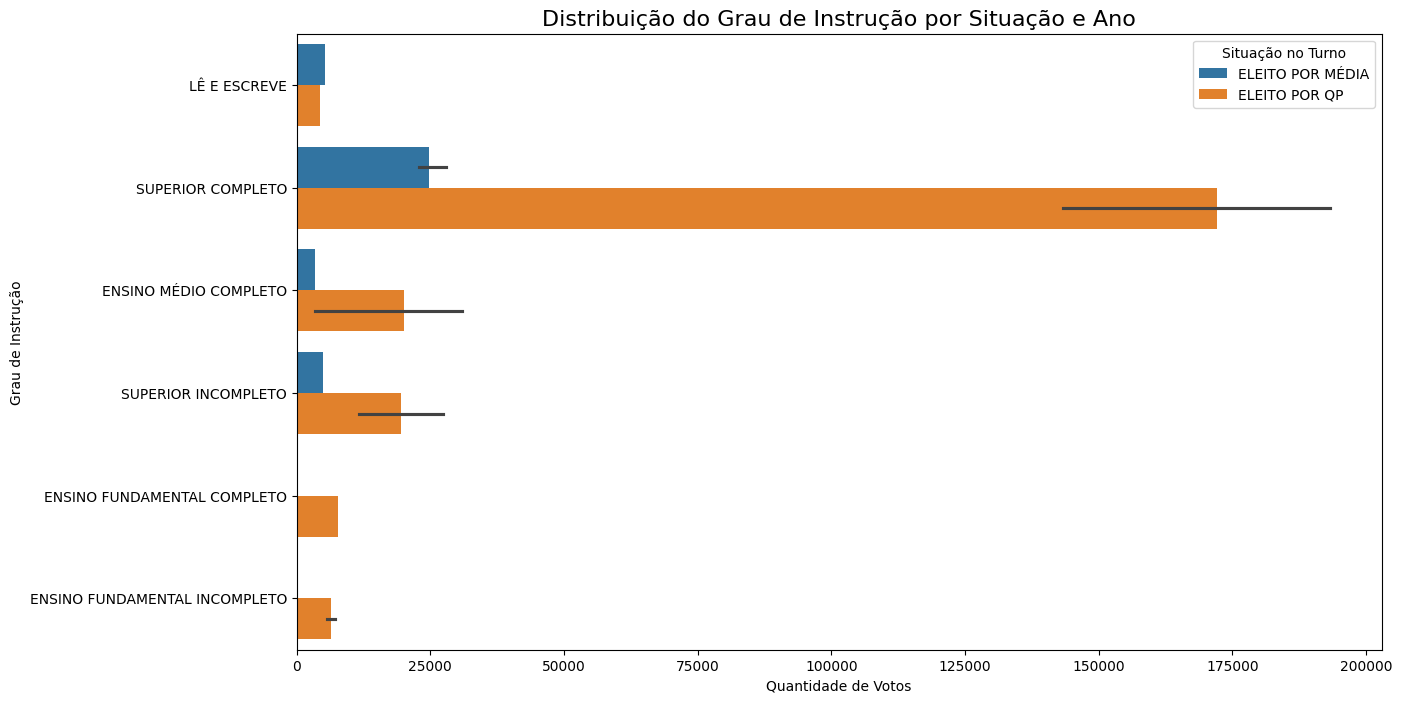

In [31]:
# Filtrar vereadores eleitos ou suplentes em Porto Alegre
candidatos_filtrados = cand_votos_total[
    ((cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR MÉDIA") |
     (cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR QP") &
    (cand_votos_total["DS_CARGO"] == "VEREADOR"))]


# Agrupar para obter a soma de votos por grau de instrução, situação e ano
agrupado_situacao = (
    candidatos_filtrados.groupby(["ANO_ELEICAO", "DS_SIT_TOT_TURNO", "DS_GRAU_INSTRUCAO"])["QT_VOTOS_NOMINAIS"]
    .sum()
    .reset_index()
)

# Criar gráfico de barras empilhadas
plt.figure(figsize=(14, 8))
sns.barplot(
    data=agrupado_situacao, 
    x="QT_VOTOS_NOMINAIS", 
    y="DS_GRAU_INSTRUCAO", 
    hue="DS_SIT_TOT_TURNO"
)

# Adicionar título e rótulos
plt.title("Distribuição do Grau de Instrução por Situação e Ano", fontsize=16)
plt.xlabel("Quantidade de Votos")
plt.ylabel("Grau de Instrução")
plt.legend(title="Situação no Turno", loc="upper right")

# Exibir o gráfico
plt.show()


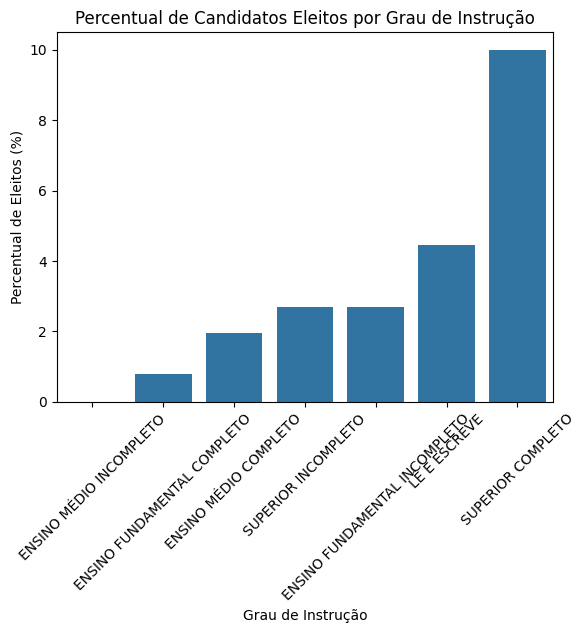

In [32]:
# Proporção de eleitos por grau de instrução
candidatos_totais = cand_votos_total.groupby("DS_GRAU_INSTRUCAO").size().reset_index(name="TOTAL_CANDIDATOS")
eleitos_totais = cand_votos_total[
    ((cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR MÉDIA") |
     (cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO POR QP") |
     (cand_votos_total["DS_SIT_TOT_TURNO"] == "ELEITO"))]

eleitos_totais = eleitos_totais.groupby("DS_GRAU_INSTRUCAO").size().reset_index(name="TOTAL_ELEITOS")

proporcao_instrucao = pd.merge(candidatos_totais, eleitos_totais, on="DS_GRAU_INSTRUCAO", how="outer").fillna(0)
proporcao_instrucao["PERCENTUAL_ELEITOS"] = (proporcao_instrucao["TOTAL_ELEITOS"] / proporcao_instrucao["TOTAL_CANDIDATOS"]) * 100

sns.barplot(data=proporcao_instrucao, x="DS_GRAU_INSTRUCAO", y="PERCENTUAL_ELEITOS", order=proporcao_instrucao.sort_values("PERCENTUAL_ELEITOS")["DS_GRAU_INSTRUCAO"])
plt.title("Percentual de Candidatos Eleitos por Grau de Instrução")
plt.xlabel("Grau de Instrução")
plt.ylabel("Percentual de Eleitos (%)")
plt.xticks(rotation=45)
plt.show()


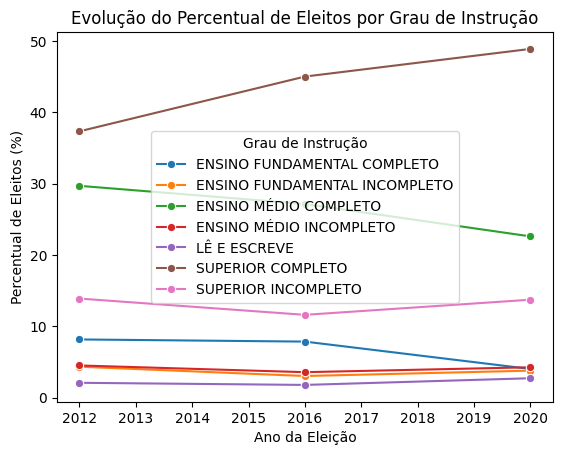

In [33]:
proporcao_instrucao_ano = (
    cand_votos_total.groupby(["ANO_ELEICAO", "DS_GRAU_INSTRUCAO"]).size().reset_index(name="TOTAL")
)
proporcao_instrucao_ano["PERCENTUAL"] = proporcao_instrucao_ano.groupby("ANO_ELEICAO")["TOTAL"].transform(lambda x: (x / x.sum()) * 100)

sns.lineplot(data=proporcao_instrucao_ano, x="ANO_ELEICAO", y="PERCENTUAL", hue="DS_GRAU_INSTRUCAO", marker="o")
plt.title("Evolução do Percentual de Eleitos por Grau de Instrução")
plt.xlabel("Ano da Eleição")
plt.ylabel("Percentual de Eleitos (%)")
plt.legend(title="Grau de Instrução")
plt.show()


# 5. Preparação do dataset final para análise.

In [34]:
# Seleção das colunas relevantes para o dataset final
colunas_finais = [
    "ANO_ELEICAO",         # Ano da eleição
    "SQ_CANDIDATO",
    "NM_CANDIDATO",        # Nome do candidato
    "DS_CARGO",            # Cargo do candidato
    "DS_GENERO",           # Gênero do candidato
    "DS_COR_RACA",         # Cor/Raça do candidato
    "DS_GRAU_INSTRUCAO",   # Grau de instrução do candidato
    "DS_SIT_TOT_TURNO",    # Situação no turno
    "QT_VOTOS_NOMINAIS",   # Quantidade de votos nominais
    "PERC_VOTOS"           # Percentual de votos
]

# Criando o dataset final
dataset_final = cand_votos_total[colunas_finais]

# Exibindo uma amostra do dataset final
print("Dataset final consolidado:")
display(dataset_final.head())

# Verificando as dimensões
print(f"Dimensões do dataset final: {dataset_final.shape}")


Dataset final consolidado:


,ANO_ELEICAO,SQ_CANDIDATO,NM_CANDIDATO,DS_CARGO,DS_GENERO,DS_COR_RACA,DS_GRAU_INSTRUCAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,PERC_VOTOS
0,2012,210000017170,JOEL FRANCISCO SOARES VIEIRA JUNIOR,VEREADOR,MASCULINO,#NE#,ENSINO MÉDIO INCOMPLETO,SUPLENTE,306,0.021007
1,2012,210000000379,ELIZABETH DOS SANTOS MASERA,VEREADOR,FEMININO,#NE#,SUPERIOR COMPLETO,SUPLENTE,586,0.040230
2,2012,210000000393,LUÍS ANDRÉ BLANCO MACHADO,VEREADOR,MASCULINO,#NE#,ENSINO MÉDIO COMPLETO,SUPLENTE,79,0.005423
3,2012,210000029793,LUCIANO VIEIRA BATISTA,VEREADOR,MASCULINO,#NE#,SUPERIOR INCOMPLETO,SUPLENTE,1317,0.090414
4,2012,210000010626,MARCELO FRANCISCO CHIODO,VEREADOR,MASCULINO,#NE#,ENSINO MÉDIO COMPLETO,SUPLENTE,3113,0.213712


Dimensões do dataset final: (1981, 10)


In [35]:
# Salvando o dataset final como um CSV
output_path = "dados_tratados/dataset_final_consolidado.csv"
dataset_final.to_csv(output_path, index=False, encoding="utf-8")
print(f"Dataset final salvo com sucesso em: {output_path}")


Dataset final salvo com sucesso em: dados_tratados/dataset_final_consolidado.csv


In [36]:
# Resumo estatístico do dataset final
print("Resumo Estatístico do Dataset Final:")
print(dataset_final.describe(include="all"))


Resumo Estatístico do Dataset Final:
        ANO_ELEICAO  SQ_CANDIDATO               NM_CANDIDATO  DS_CARGO  \
count   1981.000000  1.981000e+03                       1981      1981   
unique          NaN           NaN                       1717         2   
top             NaN           NaN  CARLOS ROBERTO COMASSETTO  VEREADOR   
freq            NaN           NaN                          3      1954   
mean    2016.543160  2.100004e+11                        NaN       NaN   
std        3.344795  4.386761e+05                        NaN       NaN   
min     2012.000000  2.100000e+11                        NaN       NaN   
25%     2012.000000  2.100000e+11                        NaN       NaN   
50%     2016.000000  2.100000e+11                        NaN       NaN   
75%     2020.000000  2.100008e+11                        NaN       NaN   
max     2020.000000  2.100013e+11                        NaN       NaN   

        DS_GENERO DS_COR_RACA  DS_GRAU_INSTRUCAO DS_SIT_TOT_TURNO  \
count